# 회귀분석
(경제학에서는) 경제학에서 의미를 가지는 데이터를 '종속변수 (dependent variable)'로 설정하고, '종속변수'를 설명할 수 있는 '독립변수 (independent variable)'를 이용하여 변수들 간의 관계를 통계적으로 추정하는 분석방법.
- 회귀분석을 하는 이유는 '경제학적 질문'으로 부터.
- 회귀분석을 시작하려면, 질문을 분석해 볼 데이터가 있는가?
    - '독립변수'는 '종속변수'의 '경제적 질문'과 연결되어 있어야 함.
- '질문'과 '데이터'가 준비되어 있다면, OLS 분석방법을 시도해 보자.
- OLS의 강력한 장점들
    - 모델이 다음과 같을 때,
        - $ \begin{equation} Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_K X_K + \varepsilon \nonumber \end{equation}$
    - 두가지 조건만 만족하면, 추정치를 구할 수 있음  
        - OLS.1: $ E(X'\varepsilon)=0 $ (consistent)
        - OLS.2: $ rank \, E(X'X)=K $ (invertable)
    - 계산법이 간단함. 추정치 $\hat{\beta}$,  
    $ \hat{\beta} = (X'X)^{-1}X'Y $
    - 간단한 모델링과 계산법으로 인해, 결과해석이 간단함 (사칙연산).  
    $ \hat{Y} = E[Y|X]= X\hat{\beta} $
    - 모델이 적합한지 확인 할 수 있는 방법이 존재.
        - 모델의 설명력의 존재 유무 테스트: Wald test, F-test, R-squared
        - 모델의 적합도 측정: RMSE
        - 추정치의 통계적 의미: t-statistics
    - 모델에 따라 개선방법들이 많이 연구되어 있음.

## OLS (Ordinary Least Square); 단순회귀분석

교육서비스를 제공해야 하나?

- 교육서비스와 소득에 경제학적 접근
    - 교육에 투자해야 할 이유
        - 개인의 경우 소득.
        - 정부의 경우 미래 세금 수입.
    - 얼마나 많은 교육 서비스를 제공 할 지
        - 유한한 자원; 서비스 비용의 증가.
        - 효율적인 자원분배; 복지나 인프라에 투자 가능.


1. '종속변수'와 '독립변수'의 관계를 수식으로 표현하기  
$\begin{align}
\ln({earnings}) = \beta_{intercept} + \beta_{school} {school} + \varepsilon \nonumber
\end{align}$
1. 그래프로 데이터 이해하기
<!-- ![fig_3_1_2](https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/doc/img/Figure_3_1_1.png?raw=true) -->
<img src="https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/doc/img/Figure_3_1_1.png?raw=true" width="800"/>


1. OLS 실행하고 분석하기
<!-- ![fig_3_1_3_a](https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/doc/img/Figure_3_1_3_a.png?raw=true) -->
<img src="https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/doc/img/Figure_3_1_3_a.png?raw=true" width="800"/>

- 추정결과  
$\begin{align}
E[\ln({earnings})|{school}] = 5.835761 + 0.0674387 \cdot {school} \nonumber
\end{align}$
    - 대학졸업자의 일주일 평균 급여: 
    $\begin{align} e^{E[ln(earning)|school=16]} &= e^{\hat{\beta}_{intercept} + \hat{\beta}_{school} \cdot 16} \nonumber\\
    &= e^{5.835761 + 0.0674387 \cdot 16} \nonumber\\
    &= e^{6.9147802} \nonumber \\
    &\sim 1007.05 \nonumber
    \end{align}$
    - 고등학교 졸업자의 일주일 평균 급여:  
    $\begin{align} e^{E[ln(earning)|school=12]} &= e^{\hat{\beta}_{intercept} + \hat{\beta}_{school} \cdot 12} \nonumber\\
    &= e^{5.835761 + 0.0674387 \cdot 12} \nonumber \\
    &= e^{6.6450254} \nonumber \\
    &\sim 768.95 \nonumber
\end{align}$
    
    - 추정값이 의미가 있는 지 확인하기
        - 관측치가 40만개가량이며, t-statistics가 2 이상이기 떄문에, 95% 이상의 관측치들이 0보다 큰 영향을 가지고 있음. 통계적으로 의미가 있음.
        - F-test 결과도 0으로 수렴하기 때문에, 모델은 설명력이 존재.
        - Adjusted $R^2$ 0.107은 상당한 설명력을 보여줌
        <!-- - 표준오차(standard error): 표준편차랑 거의 같음 -->
<!-- ![normal dist](https://currentprotocols.onlinelibrary.wiley.com/cms/asset/d39ab523-dfbe-4589-89ab-28afcbc9e0c1/cpz1801-fig-0005-m.jpg)   -->

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt

# 소수점 설정
pd.options.display.float_format = "{:,.3f}".format

# Load the dataset
df_cps = pd.read_csv("https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv")
df_cps

,Unnamed: 0,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,0,"9,930.046",11,37,Secondary,"46,406.210",10.745
1,1,"3,595.894",9,22,Secondary,"16,804.736",9.729
2,2,"24,909.450",12,30,Secondary,"116,409.640",11.665
3,3,"7,506.146",11,27,Secondary,"35,078.566",10.465
4,4,289.790,8,33,Secondary,"1,354.279",7.211
...,...,...,...,...,...,...,...
13955,13955,"2,757.438",12,22,Secondary,"12,886.370",9.464
13956,13956,"6,895.072",12,20,Secondary,"32,222.826",10.380
13957,13957,"4,221.865",12,37,Secondary,"19,730.096",9.890
13958,13958,"13,671.930",9,47,Secondary,"63,893.203",11.065


In [2]:
y_cps,X_cps = patsy.dmatrices('ln_income_at_23 ~ edu_year', data=df_cps, return_type='dataframe')

# Fit the OLS model
model_cps = sm.OLS(y_cps,X_cps)
result_cps = model_cps.fit(cov_type='HC0', use_t=True)

# Print the model summary
print(result_cps.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_income_at_23   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     245.4
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           7.49e-55
Time:                        09:20:13   Log-Likelihood:                -19164.
No. Observations:               13960   AIC:                         3.833e+04
Df Residuals:                   13958   BIC:                         3.835e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4906      0.036    292.881      0.0

In [3]:
result_cps.pvalues

Intercept   0.000
edu_year    0.000
dtype: float64

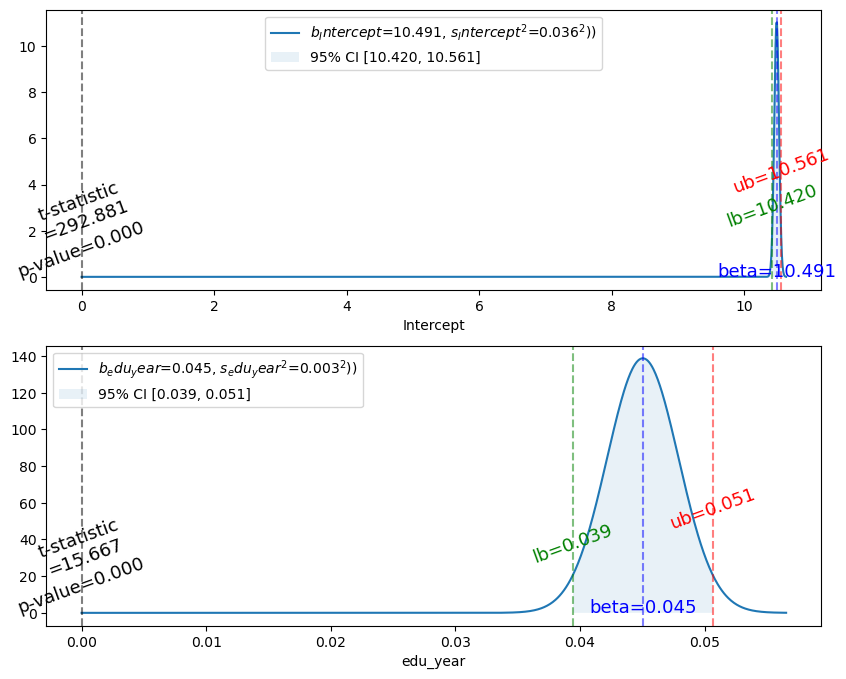

In [4]:
def draw_ols_result(ols_result):
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    # 
    betas   = list(ols_result.params.index)
    dof     = ols_result.df_resid
    # 
    fig, axs = plt.subplots(nrows=len(betas), figsize=(10, 4*len(betas)))
    # 
    for ax, beta in zip(axs, betas) :
        b_mean  = ols_result.params[beta]
        b_se    = ols_result.bse[beta]
        b_conf  = [ols_result.conf_int().loc[beta][0], ols_result.conf_int().loc[beta][1]]
        p_val   = ols_result.pvalues[beta]
        # 
        x = np.linspace(min(0, b_mean - 4 * b_se), (b_mean + 4 * b_se), 1000)
        y = stats.t.pdf(x, df=dof, loc=b_mean, scale=b_se)
        # 
        ax.plot(x, y, label=f'$b_{beta}$={b_mean:.3f}, $s_{beta}^2$={b_se:.3f}$^2$))')
        # 
        # Plot the critical values
        ax.axvline(b_conf[1], linestyle='--', alpha=0.5, color='red')
        ax.axvline(b_conf[0], linestyle='--', alpha=0.5, color='green')              
        ax.axvline(b_mean, linestyle='--', alpha=0.5, color='b')              
        # Fill between for the two-tail areas with different alphas
        ax.fill_between(x, y, where=(x > b_conf[0]) & (x < b_conf[1]), alpha=0.1, label=f'{.95:.00%} CI [{b_conf[0]:.3f}, {b_conf[1]:.3f}]')
        # text
        ax.text(b_conf[1], max(y)/3, f'ub={b_conf[1]:.3f}', horizontalalignment='center', color='red', rotation=20, size=13)
        ax.text(b_conf[0], max(y)/5, f'lb={b_conf[0]:.3f}', horizontalalignment='center', color='green', rotation=20, size=13)
        ax.text(b_mean, 0, f'beta={b_mean:.3f}', horizontalalignment='center', color='b', rotation=0, size=13)
        # 
        # mark "t-statistic"
        ax.axvline(0, linestyle='--', alpha=0.5, color='k')
        ax.text(0, max(y)/7, f't-statistic\n={(b_mean/b_se):.3f}', horizontalalignment='center', color='k', rotation=20, size=13)
        ax.text(0, 0, f'p-value={(p_val):.3f}', horizontalalignment='center', color='k', rotation=20, size=13)
        # 
        ax.set_xlabel(f'{beta}')
        # ax.set_ylabel('Probability Density')
        # ax.set_title(f'{beta}')
        # ax.set_title('p.d.f. of X')
        ax.legend()
    #
    # plt.legend()
    plt.show()

draw_ols_result(result_cps)

Total observation:13960 
95% observation are in [9.14, 12.92] 
	number of observation: 13960, 100.00%


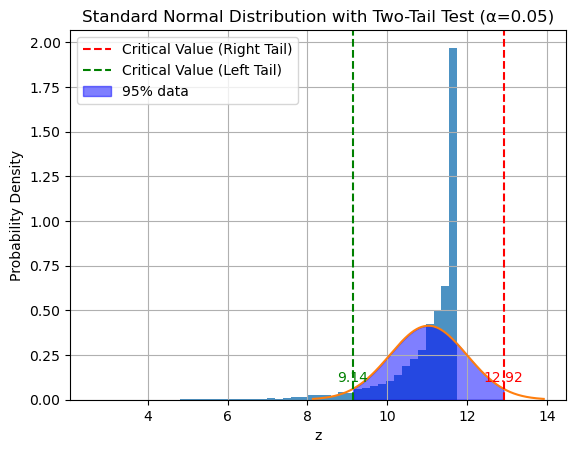

In [5]:
def draw_dist(data, alpha) :
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    mu = np.nanmean(data)
    sigma = np.nanstd(data)
    n = len(data[~np.isnan(data)])
    # Alpha level for two-tailed test
    # alpha = 0.05
    # 
    fig, ax = plt.subplots()
    ax.hist(data, bins=min(round(np.sqrt(n)),50), density=True, alpha=0.8)
    # Generate points on the x axis
    x = np.linspace((mu-3*sigma), (mu+3*sigma), 1000)
    # Calculate the normal distribution's PDF at these points:
    y = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, y)
    # Critical values for two-tailed test at alpha level
    critical_value_right = mu + stats.norm.ppf(1 - alpha / 2) * sigma
    critical_value_left  = mu + stats.norm.ppf(alpha / 2) * sigma
    # Plot the critical values
    ax.axvline(critical_value_right, color='r', linestyle='--', label='Critical Value (Right Tail)')
    ax.axvline(critical_value_left, color='g', linestyle='--', label='Critical Value (Left Tail)')
    # Labeling the critical values
    ax.text(critical_value_right, 0.1, f'{critical_value_right:.2f}', horizontalalignment='center', color='red')
    ax.text(critical_value_left, 0.1, f'{critical_value_left:.2f}', horizontalalignment='center', color='green')
    # Fill between for the two-tail areas
    ax.fill_between(x, y, where=(x > critical_value_left) & (x < critical_value_right), 
    color='blue', alpha=0.5, label=f'{(1-alpha):.00%} data')
    print(f'Total observation:{n} \n95% observation are in [{critical_value_left:.2f}, {critical_value_right:.2f}] \n\tnumber of observation: {len(data[(data>=critical_value_left)&(data<=critical_value_right)])}, {len(data[(data>=critical_value_left)&(data<=critical_value_right)])/len(data):.2%}')
    plt.xlabel('z')
    plt.ylabel('Probability Density')
    plt.title('Standard Normal Distribution with Two-Tail Test (α={alpha})'.format(alpha=alpha))
    plt.legend()
    plt.grid(True)
    plt.show()


alpha = 0.05
draw_dist(y_cps, alpha)

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt

# Load the dataset
df_hps = pd.read_csv("https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/KOSIS_houshold_panel_survey/data_income_kor.csv")
df_hps

,Unnamed: 0,date,household,female,age,ksic,ksco,income,edu_year,ln_income
0,0,2023-03-01,True,False,43.000,F,3,"5,170,000.000",12,15.458
1,1,2023-03-01,True,False,66.000,N,9,"2,176,800.000",9,14.593
2,2,2023-03-01,True,True,50.000,C,7,"2,078,090.000",12,14.547
3,3,2023-03-01,True,False,30.000,Z,Z,"700,514.000",14,13.460
4,4,2023-03-01,True,True,65.000,Q,4,"895,976.000",12,13.706
...,...,...,...,...,...,...,...,...,...,...
22052,22052,2023-12-01,False,True,39.000,M,3,"2,500,000.000",16,14.732
22053,22053,2023-12-01,False,True,51.000,P,4,"2,292,890.000",12,14.645
22054,22054,2023-12-01,False,True,39.000,P,3,"135,000.000",16,11.813
22055,22055,2023-12-01,False,True,77.000,Q,9,"270,000.000",6,12.506


In [7]:
# pd.read_excel('https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/raw/main/data/KOSIS_houshold_panel_survey/data_income_kor.xlsx')

Total observation:22057 
95% observation are in [12.51, 16.67] 
	number of observation: 22057, 100.00%


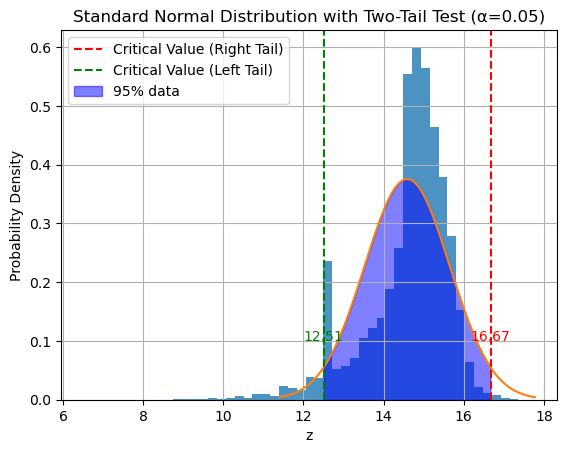

In [8]:
y,X = patsy.dmatrices('ln_income ~ edu_year', data=df_hps, return_type='dataframe')

alpha = 0.05
draw_dist(y, alpha)

In [9]:
# peak near 12.5
print(f'{np.exp(12.5):,.2f} KRW')
print(f'{np.exp(14.5):,.2f} KRW')
print(f'{np.exp(15):,.2f} KRW')
print(f'{np.exp(16.67):,.2f} KRW')

268,337.29 KRW
1,982,759.26 KRW
3,269,017.37 KRW
17,365,568.81 KRW


In [10]:
# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit(cov_type='HC0', use_t=True)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     7854.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:20:14   Log-Likelihood:                -28789.
No. Observations:               22057   AIC:                         5.758e+04
Df Residuals:                   22055   BIC:                         5.760e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5089      0.025    495.433      0.0

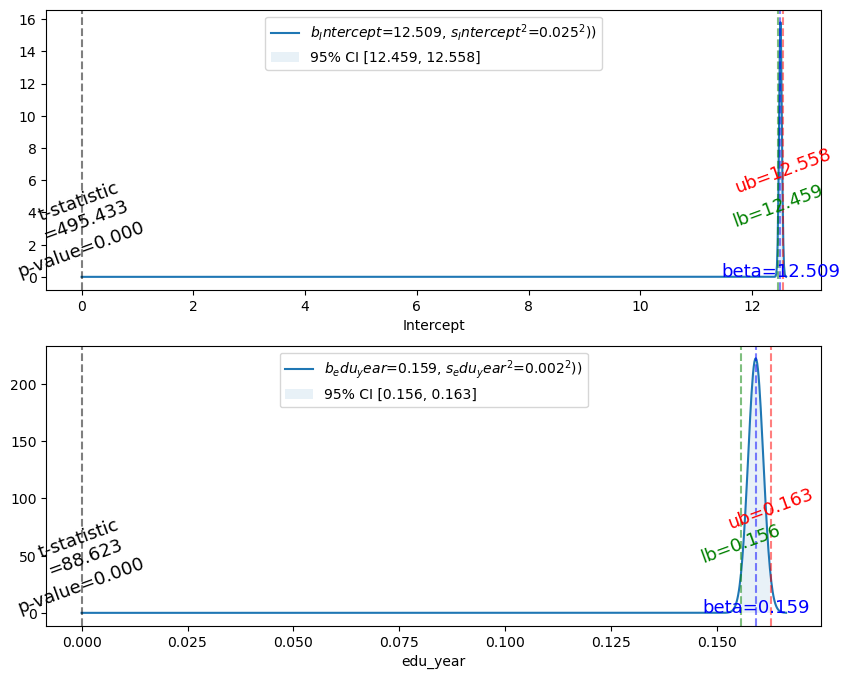

In [11]:
draw_ols_result(result)

[statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html)

In [12]:
# 관축치
result.nobs

22057.0

##### OLS 모델의 설명력 존재 유무
 * Wald test [res.wald_test()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.wald_test.html)  
 follows k DoF Chi-squared distribution. [critical value table](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)

In [13]:
result.wald_test(result.params.index.to_list(), use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=6174199.144142043, p-value=0.0, df_denom=2>

 * F-test: $ F = \frac{{\sum(y_i-\bar{y_i})^2} - {\sum(y_i-\hat{y_i})^2}}{{\sum(y_i-\hat{y_i})^2}} \cdot \frac{D.o.F.}{\#\,of\,regressors - 1} \sim \chi_{D.o.F.}^2$

In [14]:
print(f'F-statistic = {result.fvalue:.2f}\nProbability(F-statistic < chi_squred) = {result.f_pvalue:2f}')

F-statistic = 7854.06
Probability(F-statistic < chi_squred) = 0.000000


##### 추정치: $ \hat{\beta} = (X'X)^{-1}X'Y $

In [15]:
# 추정치
result.params

Intercept   12.509
edu_year     0.159
dtype: float64

##### S.E.($\hat{\beta}$) ; Standard error: $ \sqrt{Var(\hat{\beta})} $

In [16]:
# Standard Error
result.bse

Intercept   0.025
edu_year    0.002
dtype: float64

##### t-statistic (t-value) 

$\begin{align} t_{\hat{\beta}} &= \frac{\hat{\beta} - \beta}{S.E.(\hat{\beta})} \quad ,where \quad beta = 0 \nonumber \\
&= \frac{\hat{\beta}}{S.E.(\hat{\beta})}
\end{align}$ 

In [17]:
# t-statistic
result.tvalues

Intercept   495.433
edu_year     88.623
dtype: float64

##### P-value (of t-statistics)

$Probability(|t-statistic| \geq 0)$

In [18]:
# p-value
result.pvalues

Intercept   0.000
edu_year    0.000
dtype: float64

##### 신뢰구간; Confidence Interval(CI)
95%의 샘플이 속한 구간

In [19]:
# confidence inverval
result.conf_int()

,0,1
Intercept,12.459,12.558
edu_year,0.156,0.163


##### 모델의 설명력
$\begin{align} \bar{R}^2 &= 1 - \frac{RSS}{TSS} \cdot \frac{\# \, of \, observation - 1}{\# \, of \, observation - 1 - \# \, of \, regressor} \nonumber \\
&\, where \quad RSS=\sum(y_i-\hat{y_i})^2, \quad TSS=\sum(y_i-\bar{y_i})^2 \nonumber
\end{align}$

In [20]:
# adjusted R-squared
result.rsquared_adj

0.2941239971943721

##### 모델의 적합도; model's fit
RMSE: root-mean-square error
$\begin{align} MSE &= \sqrt{\frac{\sum_{i=1}^{n} (y_i-\hat{y_i})^2}{n}} \nonumber \\
RMSE &= \sqrt{MSE} \nonumber
\end{align}$

In [21]:
# RMSE; root mean squred error
result.mse_resid**.5

0.892534652476287

##### 추정치로 교육연도별 평균임금 추정치 구하기

- $ \hat{\beta}_{Intercept} $
- $ \hat{\beta}_{school} $

In [22]:
beta_intercept = result.params['Intercept']
beta_school = result.params['edu_year']
print(f'beta_intercept = {beta_intercept:.3f}, beta_school={beta_school:.3f}')

beta_intercept = 12.509, beta_school=0.159


- 대학졸업자의 일주일 평균 급여: 
    $\begin{align} e^{E[ln(earning)|school=16]} &= e^{\hat{\beta}_{intercept} + \hat{\beta}_{school} \cdot 16} \nonumber
    \end{align}$


In [23]:
# 대학졸업자 월평균 임금
print(f'{np.exp(beta_intercept + beta_school * 16):,.2f} KRW')

3,451,045.72 KRW


- 고등학교 졸업자의 일주일 평균 급여:  
    $\begin{align} e^{E[ln(earning)|school=12]} &= e^{\hat{\beta}_{intercept} + \hat{\beta}_{school} \cdot 12} \nonumber
    \end{align}$

In [24]:
# 고등학교졸업자 월평균 임금
print(f'{np.exp(beta_intercept + beta_school * 12):,.2f} KRW')

1,826,423.77 KRW


##### 행렬연산으로 추정치 구해보기 
$ \hat{\beta} = (X'X)^{-1}X'Y $

In [25]:
mat_x = np.matrix(X)
mat_y = np.matrix(y)

xTx = mat_x.T * mat_x
xTx_inv = np.linalg.inv(xTx)
xTy = mat_x.T * mat_y

beta_hat = xTx_inv * xTy
print('beta :',beta_hat, '\nbeta 0:',beta_hat[0], '\nbeta 1:',beta_hat[1])

beta : [[12.50891801]
 [ 0.15907937]] 
beta 0: [[12.50891801]] 
beta 1: [[0.15907937]]


### OLS 결과 분석

#### 추정치를 그래프로 표현해보기
교육연도에 따른 임금변화율을 그래프로 표현

In [26]:
# fig, ax = plt.subplots()
# ax.scatter(x=result.predict(), y=df_hps['ln_income'], alpha=0.1, s=5, marker='D', c='b')

# # plt.legend(['CEF', 'Fitted', 'Actual'])
# plt.show

In [27]:
# 관측치를 이용하여 교육연도별 임금평균
school_means = df_hps.groupby('edu_year')['ln_income'].mean()
school_means

edu_year
0    12.704
6    13.221
9    13.857
12   14.509
14   14.756
16   15.054
18   15.156
21   15.573
Name: ln_income, dtype: float64

In [28]:
result.predict(sm.add_constant(range(0,22)))


array([12.50891801, 12.66799737, 12.82707674, 12.9861561 , 13.14523547,
       13.30431483, 13.4633942 , 13.62247356, 13.78155293, 13.94063229,
       14.09971166, 14.25879102, 14.41787039, 14.57694975, 14.73602912,
       14.89510849, 15.05418785, 15.21326722, 15.37234658, 15.53142595,
       15.69050531, 15.84958468])

<function matplotlib.pyplot.show(close=None, block=None)>

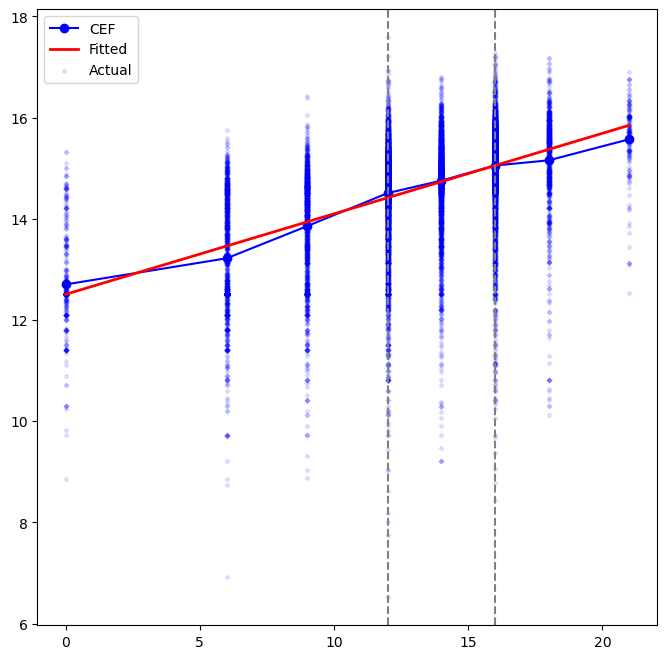

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(school_means, linestyle='-', marker='o', c='b')
ax.plot(result.predict(sm.add_constant(range(0,22))) ,linestyle='-', linewidth=2, c='r')
ax.scatter(df_hps['edu_year'], df_hps['ln_income'], alpha=0.1, s=5, marker='D', c='b')

# HS
edu_year = 12
ax.axvline(edu_year, color='0.5', linestyle='--', label='HS')
# Post-secondary
edu_year = 16
ax.axvline(edu_year, color='0.5', linestyle='--', label='PS')
        


plt.legend(['CEF', 'Fitted', 'Actual'])
plt.show

### OLS.1 가정이 성립하지 않을때
#### 시나리오: 높은 인적자본을 가진 표본들의 노동시간이 더 많을 경우 

In [30]:
def ols_alt_spec(spec, data, show_res=True):
    y,X = patsy.dmatrices(spec, data=data, return_type='dataframe')
    model  = sm.OLS(y,X)
    result = model.fit(cov_type='HC0', use_t=True)
    if show_res : print(result.summary())
    return result

In [31]:
# df_hps = df_hps[['income', 'edu_year']]
df_hps['income_alt'] = df_hps.apply(lambda x : x['income'] * 0.8 if x['edu_year'] >= 14 else x['income'], axis=1)
df_hps['ln_income_alt'] = np.log(df_hps['income_alt'])
result_alt_age = ols_alt_spec(spec='ln_income_alt ~ edu_year', data= df_hps)

                            OLS Regression Results                            
Dep. Variable:          ln_income_alt   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     5718.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:20:15   Log-Likelihood:                -28911.
No. Observations:               22057   AIC:                         5.783e+04
Df Residuals:                   22055   BIC:                         5.784e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7000      0.025    503.557      0.0

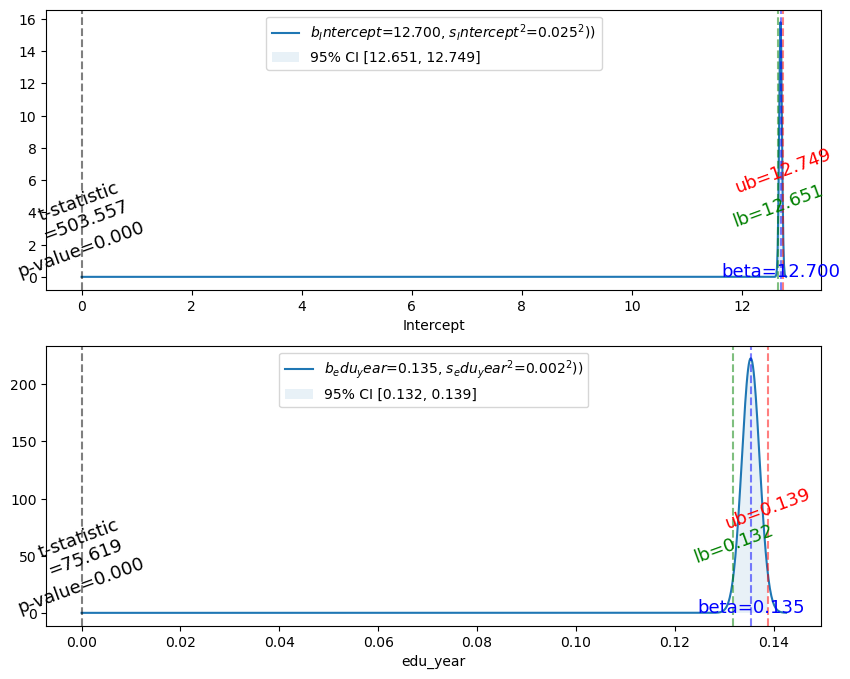

In [32]:
draw_ols_result(result_alt_age)

<function matplotlib.pyplot.show(close=None, block=None)>

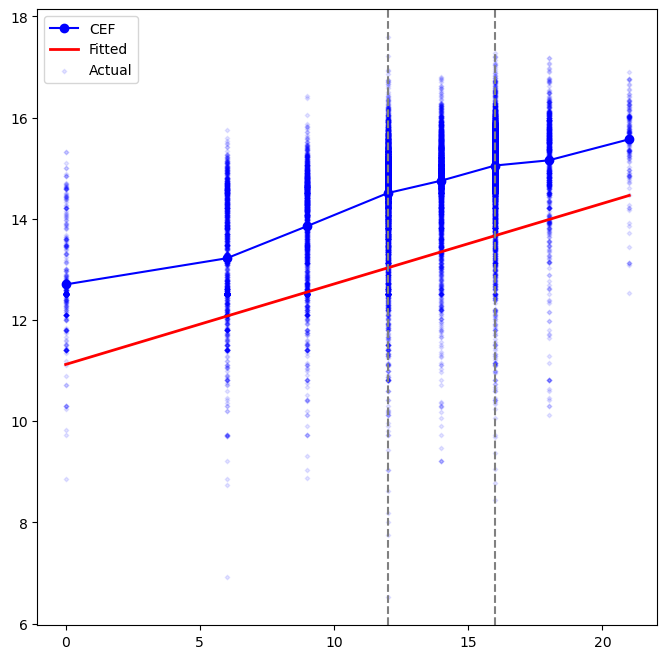

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(school_means, linestyle='-', marker='o', c='b')
ax.plot(result_alt_age.predict(sm.add_constant(range(0,22))) ,linestyle='-', linewidth=2, c='r')
ax.scatter(df_hps['edu_year'], df_hps['ln_income'], alpha=0.1, s=5, marker='D', c='b')

# HS
edu_year = 12
ax.axvline(edu_year, color='0.5', linestyle='--', label='HS')
# Post-secondary
edu_year = 16
ax.axvline(edu_year, color='0.5', linestyle='--', label='PS')
        


plt.legend(['CEF', 'Fitted', 'Actual'])
plt.show

### POLS - Pooled OLS

In [33]:
ols_alt_spec(spec='ln_income ~ edu_year', data= df_hps.loc[(df_hps['date']=='2023-03-01')])
ols_alt_spec(spec='ln_income ~ edu_year', data= df_hps.loc[(df_hps['date']=='2023-06-01')])
ols_alt_spec(spec='ln_income ~ edu_year', data= df_hps.loc[(df_hps['date']=='2023-09-01')])
ols_alt_spec(spec='ln_income ~ edu_year', data= df_hps.loc[(df_hps['date']=='2023-12-01')])

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1893.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:20:15   Log-Likelihood:                -7310.6
No. Observations:                5395   AIC:                         1.463e+04
Df Residuals:                    5393   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2846      0.058    212.110      0.0

In [34]:
# OLS는 unit-free

df_tt = df_hps[['income', 'edu_year']]
df_tt['ln_income_month_to_week'] = np.log(df_tt['income']/4)
result_alt_age = ols_alt_spec(spec='ln_income_month_to_week ~ edu_year', data= df_tt)

                               OLS Regression Results                              
Dep. Variable:     ln_income_month_to_week   R-squared:                       0.294
Model:                                 OLS   Adj. R-squared:                  0.294
Method:                      Least Squares   F-statistic:                     7854.
Date:                     Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                             09:20:15   Log-Likelihood:                -28789.
No. Observations:                    22057   AIC:                         5.758e+04
Df Residuals:                        22055   BIC:                         5.760e+04
Df Model:                                1                                         
Covariance Type:                       HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5108\4229247235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['ln_income_month_to_week'] = np.log(df_tt['income']/4)
